# Logit

## Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Dados

In [2]:
df = pd.read_excel(
        "listerine.xlsx",
        sheet_name="BD"
    )

df = df \
    .assign(
        size = (
            lambda ldf:
            ldf["size"] \
                .str \
                .split(
                    " ",
                    expand=True
                ) \
                .iloc[:, 1] \
                .astype(int) \
                .div(1000)
        )
    )

In [3]:
df.head()

,id,idtransaction,product,product2,idproduct,idconsumer,city,company,brand,brand2,...,channel,idchannel,year,month,package,size,promotion,date,payment,socialclass
0,1,104058879,ANTI-SEPTICO BUCAL,LIQUIDO,490862,30499,São Paulo,JOHNSON & JOHNSON,LISTERINE,COOL MINT,...,OUTROS SUPERMERCADOS,41,2016,7,Unitário,0.50,SEM PROMOÇÃO,2016-07-21,Dinheiro,B2
1,2,104732640,ANTI-SEPTICO BUCAL,LIQUIDO,869913,33923,São Paulo,IND. RAYMONDS LTDA,BONTE EVERYDAY,MENTA,...,DIA %,399,2016,8,Unitário,0.50,SEM PROMOÇÃO,2016-08-06,Cartão de Débito,B2
2,3,104732612,ANTI-SEPTICO BUCAL,LIQUIDO,769238,43915,São Paulo,P&G,ORAL-B,PRO SAUDE/CLINICAL PROTEC,...,DIA %,399,2016,8,Unitário,0.25,SEM PROMOÇÃO,2016-08-01,Cartão de Débito,C2
3,4,99066434,ANTI-SEPTICO BUCAL,LIQUIDO,728190,9068,São Paulo,JOHNSON & JOHNSON,LISTERINE,WHITENING,...,DIA %,399,2015,11,Unitário,0.50,SEM PROMOÇÃO,2015-11-24,Dinheiro,C1
4,5,99066435,ANTI-SEPTICO BUCAL,LIQUIDO,758948,9199,São Paulo,COLGATE PALMOLIVE,COLGATE PLAX,FRESH MINT,...,ASSAI,435,2015,11,Unitário,0.75,LEVE.MAIS PAG.MENOS,2015-11-24,Cartão de Crédito,AB1


## Descritivas

In [4]:
df["size"].mean()

0.42348850574712643

In [5]:
df \
    .groupby("idconsumer") \
    .count() \
    ["idtransaction"] \
    .sort_values(ascending=False) \
    .apply(lambda x: x > 1) \
    .sum()


147

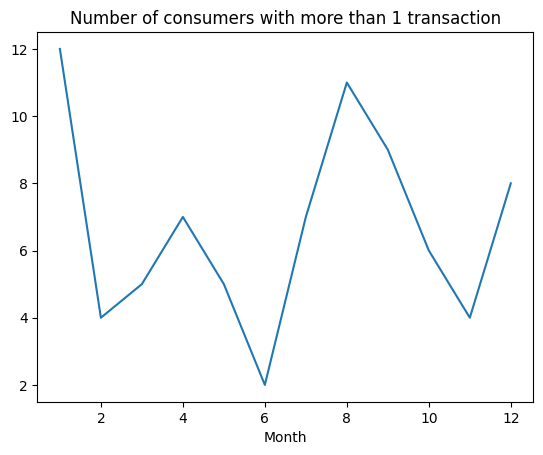

In [9]:
df \
    .groupby(["month","idconsumer"]) \
    ["idtransaction"] \
    .count() \
    .apply(lambda x: x > 1) \
    .reset_index() \
    .drop("idconsumer", axis=1) \
    .groupby("month") \
    .sum() \
    .plot()

plt.title("Number of consumers with more than 1 transaction")
plt.xlabel("Month")
plt.legend().remove()
plt.show()

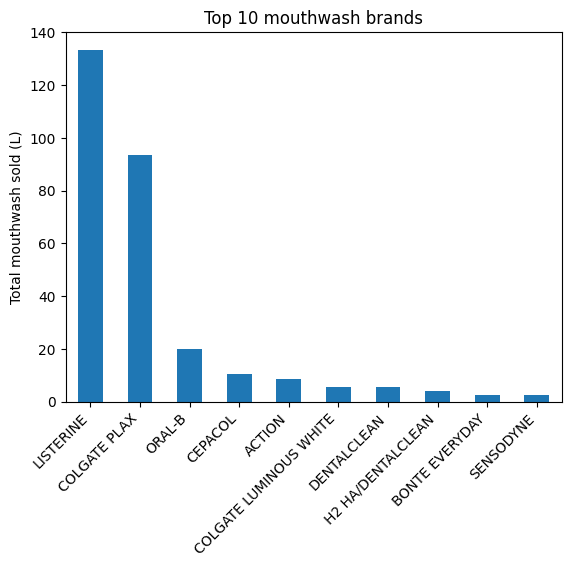

In [7]:
df \
    [["brand", "size"]] \
    .groupby("brand") \
    .sum() \
    .nlargest(10, "size") \
    .plot(kind="bar")

plt.xlabel("")
plt.ylabel("Total mouthwash sold (L)")
plt.title("Top 10 mouthwash brands")
plt.legend().remove()
plt.xticks(rotation=45, ha="right")
plt.show()

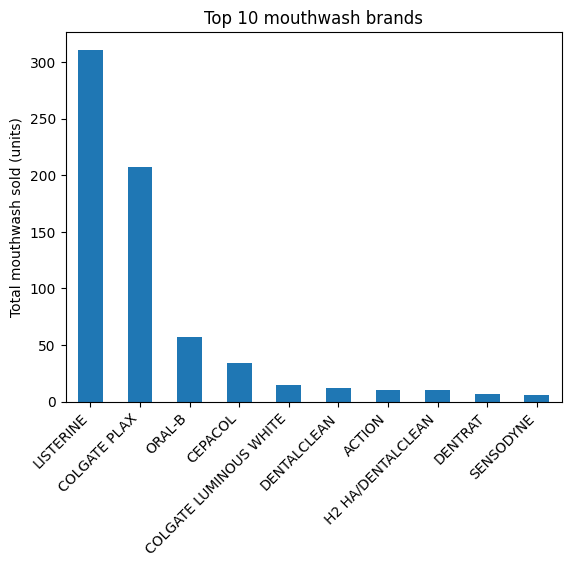

In [8]:
df \
    [["brand", "idtransaction"]] \
    .groupby("brand") \
    .count() \
    .nlargest(10, "idtransaction") \
    .plot(kind="bar")

plt.xlabel("")
plt.ylabel("Total mouthwash sold (units)")
plt.title("Top 10 mouthwash brands")
plt.legend().remove()
plt.xticks(rotation=45, ha="right")
plt.show()